In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np
from time import time
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# WINDOW_SIZE = 257, CODEBOOK_SIZE = 10000

enable_norm = True

X_train = np.loadtxt("feature_train.csv", delimiter = ",").reshape(-1,384)
y_train = np.loadtxt("label_train.csv", delimiter = ",")
X_test = np.loadtxt("feature_test.csv", delimiter=",").reshape(-1,384)
y_test = np.loadtxt("label_test.csv", delimiter=",")


In [0]:
if enable_norm:
    X_train = np.transpose(X_train)
    X_test = np.transpose(X_test)

    model_normalizer_horizontal = MinMaxScaler()
    model_normalizer_horizontal.fit(X_train)
    X_train = model_normalizer_horizontal.transform(X_train)

    model_normalizer_horizontal = MinMaxScaler()
    model_normalizer_horizontal.fit(X_test)
    X_test = model_normalizer_horizontal.transform(X_test)

    X_train = np.transpose(X_train)
    X_test = np.transpose(X_test)

    model_normalizer_vertical = MinMaxScaler()
    model_normalizer_vertical.fit(X_train)

    X_train = model_normalizer_vertical.transform(X_train)
    X_test = model_normalizer_vertical.transform(X_test)

In [0]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [0]:
np.unique(y_train)

array([0., 1.])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

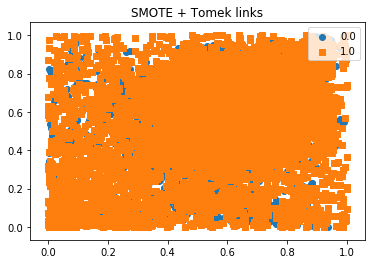

In [0]:
import imblearn

from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_sample(X_train, y_train)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')


In [0]:
X_train, y_train = X_smt, y_smt
X_test, y_test = smt.fit_sample(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
label_names = ['Buggy', 'Correct']

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

-> Processing 10-Fold Cross Validation and Grid Search

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1916s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4366s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   24.7s
[Parallel(n_jo

-> Done! Show Grid scores

{'mean_fit_time': array([0.0190001 , 0.344712  , 0.01935847, 0.4645834 , 0.01987205,
       0.99937778, 0.01801646, 1.87990642, 0.01840403, 1.99075971,
       0.01842771, 2.02554464, 0.01911933, 2.01144373, 0.01856809,
       2.0012804 , 0.01971903, 2.04476657, 0.0191417 , 1.89047232]), 'std_fit_time': array([0.0041734 , 0.01291883, 0.00074599, 0.00988159, 0.00141819,
       0.06561746, 0.00146188, 0.2879348 , 0.00111353, 0.04086926,
       0.00072008, 0.04943034, 0.00158849, 0.05909923, 0.00066673,
       0.03855504, 0.00200911, 0.04837446, 0.00044497, 0.24129882]), 'mean_score_time': array([0.        , 0.00483429, 0.        , 0.00462394, 0.        ,
       0.00441041, 0.        , 0.00450859, 0.        , 0.0044306 ,
       0.        , 0.00445802, 0.        , 0.0044585 , 0.        ,
       0.00424414, 0.        , 0.00632715, 0.        , 0.00386996]), 'std_score_time': array([0.        , 0.00042316, 0.        , 0.00036749, 0.        ,
       0.00041493, 0.    

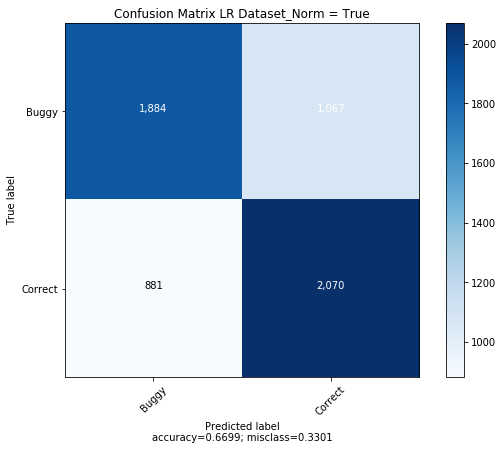

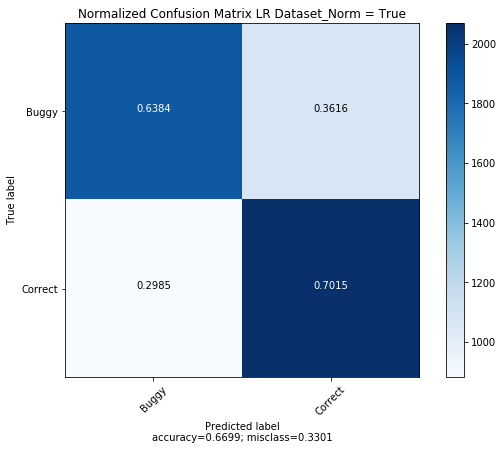




              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66      2951
         1.0       0.66      0.70      0.68      2951

    accuracy                           0.67      5902
   macro avg       0.67      0.67      0.67      5902
weighted avg       0.67      0.67      0.67      5902


Accuracy 0.6699423924093527
Training time : 41.996

Test time : 0.003




In [0]:
# LR
param_grid_ = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], "penalty":["l1","l2"]}
print('-> Processing 10-Fold Cross Validation and Grid Search\n')

bow_search = GridSearchCV(LogisticRegression(), cv=10, param_grid=param_grid_, scoring='f1_micro', n_jobs=-1, verbose=10)
t0 = time()
bow_search.fit(X_train, y_train)
training_time = round(time()-t0, 3)
print('-> Done! Show Grid scores\n')

print(bow_search.cv_results_,'\n\n')

print("Best parameters set found on development set:\n")
print(bow_search.best_params_,'\n')
print("Grid scores on development set:\n")
means = bow_search.cv_results_['mean_test_score']
stds = bow_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bow_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('\n\n')
print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n\n")
t0 = time()
y_true, y_pred = y_test, bow_search.predict(X_test)
test_time = round(time()-t0, 3)
cmat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm           = cmat, 
                      normalize    = False,
                      target_names = label_names,
                      cmap = plt.get_cmap('Blues'),
                      title        = "Confusion Matrix LR Dataset_Norm = %s" % str(enable_norm))
plot_confusion_matrix(cm           = cmat, 
                      target_names = label_names,
                      cmap = plt.get_cmap('Blues'),
                      title        = "Normalized Confusion Matrix LR Dataset_Norm = %s" % str(enable_norm))
print('\n\n')
print(classification_report(y_true, y_pred))
print()
print('Accuracy', metrics.accuracy_score(y_pred,y_test))
print("Training time : {}\n".format(training_time))
print("Test time : {}\n".format(test_time))
print()

In [0]:
# NB
parameters = {'alpha': (1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000)}
bow_search = GridSearchCV(MultinomialNB(), parameters, cv=10, scoring='f1_micro', n_jobs=-1, verbose=10)
t0 = time()
bow_search.fit(X_train, y_train)
training_time = round(time()-t0, 3)
print('-> Done! Show Grid scores\n')

print(bow_search.cv_results_,'\n\n')

print("Best parameters set found on development set:\n")
print(bow_search.best_params_,'\n')
print("Grid scores on development set:\n")
means = bow_search.cv_results_['mean_test_score']
stds = bow_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bow_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('\n\n')
print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n\n")
t0 = time()
y_true, y_pred = y_test, bow_search.predict(X_test)
test_time = round(time()-t0, 3)
print(confusion_matrix(y_true, y_pred))
print('\n\n')
print(classification_report(y_true, y_pred))
print()
print('Accuracy', metrics.accuracy_score(y_pred,y_test))
print("Training time : {}\n".format(training_time))
print("Test time : {}\n".format(test_time))
print()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0965s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.4s


-> Done! Show Grid scores

{'mean_fit_time': array([0.06029358, 0.057565  , 0.05866191, 0.0568599 , 0.05749445,
       0.05974982, 0.05794721, 0.05739462, 0.06062844, 0.05211835]), 'std_fit_time': array([0.00201632, 0.00274802, 0.00558983, 0.00309904, 0.00360938,
       0.01358788, 0.00965009, 0.00359187, 0.01036147, 0.00900307]), 'mean_score_time': array([0.00604727, 0.0053261 , 0.00592117, 0.00652804, 0.00598619,
       0.00584521, 0.00632575, 0.00566976, 0.00699563, 0.00487449]), 'std_score_time': array([0.00124438, 0.00087533, 0.00119134, 0.00163671, 0.00118178,
       0.00097797, 0.00128827, 0.00102494, 0.00287032, 0.00134245]), 'param_alpha': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 1e-06}, {'alpha': 1e-05}, {'alpha': 0.0001}, {'alpha': 0.001}, {'a

[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished


In [0]:
# SGD
param_grid_ = [
  {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01]}, {'penalty': ['elasticnet']} ]
bow_search = GridSearchCV(SGDClassifier(max_iter=2), cv=10, param_grid=param_grid_, scoring='f1_micro', n_jobs=-1, verbose=10)
t0 = time()
bow_search.fit(X_train, y_train)
training_time = round(time()-t0, 3)
print('-> Done! Show Grid scores\n')

print(bow_search.cv_results_,'\n\n')

print("Best parameters set found on development set:\n")
print(bow_search.best_params_,'\n')
print("Grid scores on development set:\n")
means = bow_search.cv_results_['mean_test_score']
stds = bow_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bow_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('\n\n')
print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n\n")
t0 = time()
y_true, y_pred = y_test, bow_search.predict(X_test)
test_time = round(time()-t0, 3)
print(confusion_matrix(y_true, y_pred))
print('\n\n')
print(classification_report(y_true, y_pred))
print()
print('Accuracy', metrics.accuracy_score(y_pred,y_test))
print("Training time : {}\n".format(training_time))
print("Test time : {}\n".format(test_time))
print()

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1931s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:    2.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-> Done! Show Grid scores

{'mean_fit_time': array([0.07255096, 0.07344344, 0.07041426, 0.07123504, 0.07177334,
       0.07662079, 0.13754265]), 'std_fit_time': array([0.00386325, 0.00433205, 0.00396367, 0.00249154, 0.00423963,
       0.00438108, 0.00599617]), 'mean_score_time': array([0.0041842 , 0.00389698, 0.00402234, 0.00424876, 0.00478101,
       0.00529029, 0.0034059 ]), 'std_score_time': array([0.00048883, 0.00055726, 0.0005474 , 0.0008535 , 0.00201867,
       0.00328538, 0.0006472 ]), 'param_alpha': masked_array(data=[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, --],
             mask=[False, False, False, False, False, False,  True],
       fill_value='?',
            dtype=object), 'param_penalty': masked_array(data=[--, --, --, --, --, --, 'elasticnet'],
             mask=[ True,  True,  True,  True,  True,  True, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 1e-07}, {'alpha': 1e-06}, {'alpha': 1e-05}, {'alpha': 0.0001}, {'alpha': 0.001}, {'alph

In [0]:
# RF
param_grid_ = {"min_samples_leaf": [2, 3, 5, 7, 10, 100, 250, 500, 1000]}
bow_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_, cv=10, scoring='f1_micro', n_jobs=-1, verbose=10)
t0 = time()
bow_search.fit(X_train, y_train)
training_time = round(time()-t0, 3)
print('-> Done! Show Grid scores\n')

print(bow_search.cv_results_,'\n\n')

print("Best parameters set found on development set:\n")
print(bow_search.best_params_,'\n')
print("Grid scores on development set:\n")
means = bow_search.cv_results_['mean_test_score']
stds = bow_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bow_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('\n\n')
print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n\n")
t0 = time()
y_true, y_pred = y_test, bow_search.predict(X_test)
test_time = round(time()-t0, 3)
print(confusion_matrix(y_true, y_pred))
print('\n\n')
print(classification_report(y_true, y_pred))
print()
print('Accuracy', metrics.accuracy_score(y_pred,y_test))
print("Training time : {}\n".format(training_time))
print("Test time : {}\n".format(test_time))
print()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 13.2min finished


-> Done! Show Grid scores

{'mean_fit_time': array([56.51254847, 54.22019198, 49.99244652, 47.57934372, 44.3524246 ,
       24.86764867, 17.65186052, 12.43094757,  7.99408395]), 'std_fit_time': array([2.07274238, 1.86588713, 1.79062717, 2.04393132, 1.6516378 ,
       0.66599492, 0.2555911 , 0.11507015, 0.14562177]), 'mean_score_time': array([0.06523011, 0.06187904, 0.05868688, 0.05814052, 0.0553551 ,
       0.0455255 , 0.04242518, 0.03917735, 0.03283281]), 'std_score_time': array([0.00398849, 0.00396039, 0.00117119, 0.00148243, 0.00067024,
       0.00139242, 0.00184529, 0.00089444, 0.00570897]), 'param_min_samples_leaf': masked_array(data=[2, 3, 5, 7, 10, 100, 250, 500, 1000],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'min_samples_leaf': 2}, {'min_samples_leaf': 3}, {'min_samples_leaf': 5}, {'min_samples_leaf': 7}, {'min_samples_leaf': 10}, {'min_samples_leaf': 100}

In [0]:
# DT
param_grid_ = {"min_samples_leaf": [2, 3, 5, 7, 10, 100, 250, 500, 1000]}
bow_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_, cv=10, scoring='f1_micro', n_jobs=-1, verbose=10)
t0 = time()
bow_search.fit(X_train, y_train)
training_time = round(time()-t0, 3)
print('-> Done! Show Grid scores\n')

print(bow_search.cv_results_,'\n\n')

print("Best parameters set found on development set:\n")
print(bow_search.best_params_,'\n')
print("Grid scores on development set:\n")
means = bow_search.cv_results_['mean_test_score']
stds = bow_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bow_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('\n\n')
print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n\n")
t0 = time()
y_true, y_pred = y_test, bow_search.predict(X_test)
test_time = round(time()-t0, 3)
print(confusion_matrix(y_true, y_pred))
print('\n\n')
print(classification_report(y_true, y_pred))
print()
print('Accuracy', metrics.accuracy_score(y_pred,y_test))
print("Training time : {}\n".format(training_time))
print("Test time : {}\n".format(test_time))
print()

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.4min finished


-> Done! Show Grid scores

{'mean_fit_time': array([22.74681501, 22.24669576, 20.58809903, 18.93789096, 18.2290807 ,
        9.26307676,  6.94392316,  5.33455408,  3.63265183]), 'std_fit_time': array([1.90401508, 2.6144673 , 2.70166039, 1.59027019, 2.12712769,
       0.98963171, 0.99415266, 0.43523258, 0.40221543]), 'mean_score_time': array([0.00477026, 0.00477638, 0.00464594, 0.00466285, 0.00472147,
       0.00466206, 0.00449162, 0.00454652, 0.0043468 ]), 'std_score_time': array([0.00021362, 0.0001943 , 0.00013196, 0.00019449, 0.00014669,
       0.00017286, 0.00015595, 0.00024547, 0.00054705]), 'param_min_samples_leaf': masked_array(data=[2, 3, 5, 7, 10, 100, 250, 500, 1000],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'min_samples_leaf': 2}, {'min_samples_leaf': 3}, {'min_samples_leaf': 5}, {'min_samples_leaf': 7}, {'min_samples_leaf': 10}, {'min_samples_leaf': 100}

In [0]:
# KNN
param_grid_ = {'n_neighbors': [1], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
bow_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_, cv=10, scoring='f1_micro', n_jobs=-1, verbose=10)
t0 = time()
bow_search.fit(X_train, y_train)
training_time = round(time()-t0, 3)
print('-> Done! Show Grid scores\n')

print(bow_search.cv_results_,'\n\n')

print("Best parameters set found on development set:\n")
print(bow_search.best_params_,'\n')
print("Grid scores on development set:\n")
means = bow_search.cv_results_['mean_test_score']
stds = bow_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bow_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('\n\n')
print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n\n")
t0 = time()
y_true, y_pred = y_test, bow_search.predict(X_test)
test_time = round(time()-t0, 3)
print(confusion_matrix(y_true, y_pred))
print('\n\n')
print(classification_report(y_true, y_pred))
print()
print('Accuracy', metrics.accuracy_score(y_pred,y_test))
print("Training time : {}\n".format(training_time))
print("Test time : {}\n".format(test_time))
print()

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:  1.8min remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.9min finished


-> Done! Show Grid scores

{'mean_fit_time': array([0.93626695, 0.93465097, 0.94523325, 0.95129714]), 'std_fit_time': array([0.01237006, 0.00623403, 0.00736014, 0.00703882]), 'mean_score_time': array([ 8.62020535,  8.57663801, 11.79006064, 11.56875889]), 'std_score_time': array([0.59564819, 0.61045295, 0.7808956 , 0.90052083]), 'param_metric': masked_array(data=['euclidean', 'euclidean', 'manhattan', 'manhattan'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_neighbors': masked_array(data=[1, 1, 1, 1],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}, {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}, {'metric':